To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [57]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

In [58]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

ANS: yes, there are difference. 

(I) first use discriptive stats methods. group by 1.gener, 2.ethnicities, 3. parental leval regarding performance in exam
(II) use visualization methods

In [59]:
# descriptive statistics methods

print(df.groupby("gender").describe())
print('-------------')
print(df.groupby("race/ethnicity").describe())
print('-------------')
print(df.groupby("parental level of education").describe())
print('-------------')

       math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0 

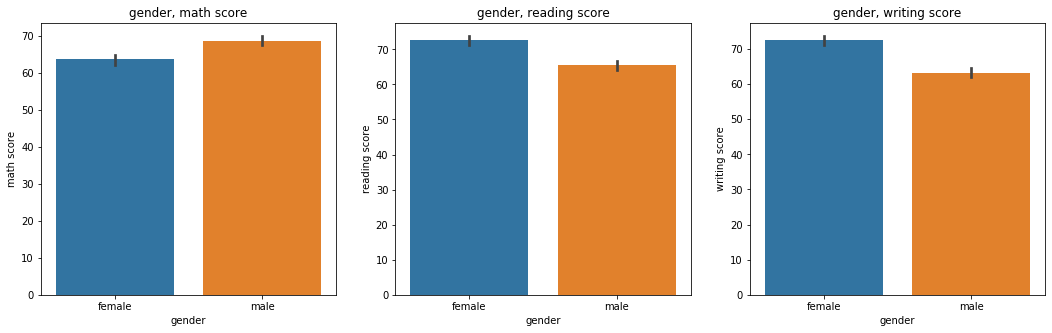

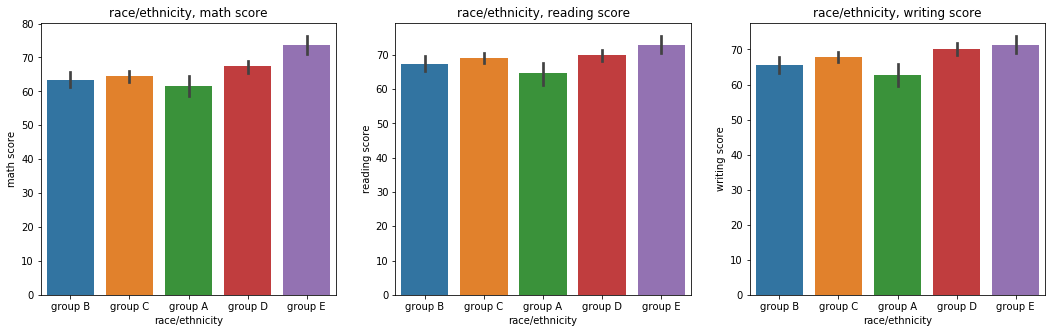

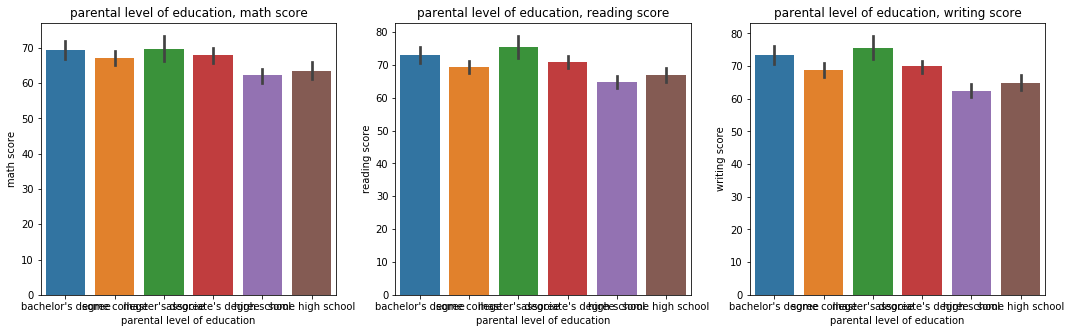

In [60]:
#  visualization methods - barplot show mean, and confidence interval

# group by geneder, 
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(df["gender"], df["math score"])
plt.title("gender, math score")

plt.subplot(1,3,2)
sns.barplot(df["gender"], df["reading score"])
plt.title("gender, reading score")

plt.subplot(1,3,3)
sns.barplot(df["gender"], df["writing score"])
plt.title("gender, writing score")
plt.show()

# group by race/ethnicity, 
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(df["race/ethnicity"], df["math score"])
plt.title("race/ethnicity, math score")

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"], df["reading score"])
plt.title("race/ethnicity, reading score")

plt.subplot(1,3,3)
sns.barplot(df["race/ethnicity"], df["writing score"])
plt.title("race/ethnicity, writing score")
plt.show()

# group by parental level of education, 
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(df["parental level of education"], df["math score"])
plt.title("parental level of education, math score")

plt.subplot(1,3,2)
sns.barplot(df["parental level of education"], df["reading score"])
plt.title("parental level of education, reading score")

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"], df["writing score"])
plt.title("parental level of education, writing score")
plt.show()

Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

ANS: yes. students having standard lunch has average higher score than those with free/redueced lunch. This result is probably due to students with have stand lunch get more energy to study and thus have higher average scores.

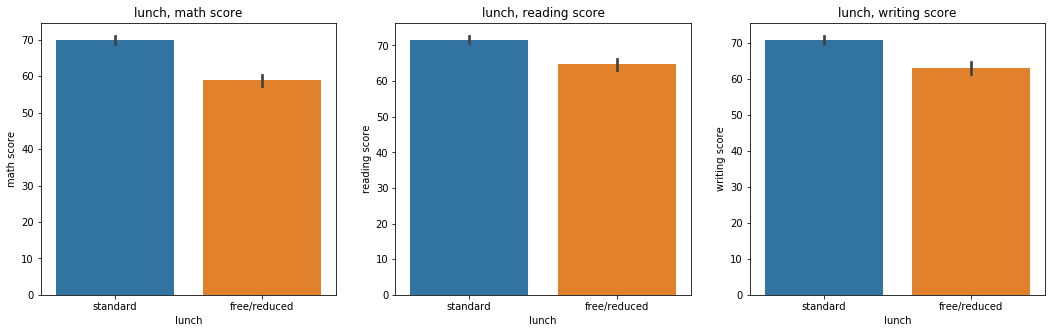

In [61]:
# visulazation method
# group by lunch
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(df["lunch"], df["math score"])
plt.title("lunch, math score")

plt.subplot(1,3,2)
sns.barplot(df["lunch"], df["reading score"])
plt.title("lunch, reading score")

plt.subplot(1,3,3)
sns.barplot(df["lunch"], df["writing score"])
plt.title("lunch, writing score")
plt.show()

3. Does the test preparation course seem to have an effect on the exam performances?

ANS: it looks like the students with completed preparation course have higher scores than those without.
Also the t-test showed that the the scores between students take completed preparation course is significant different from those without taking preparation courses.

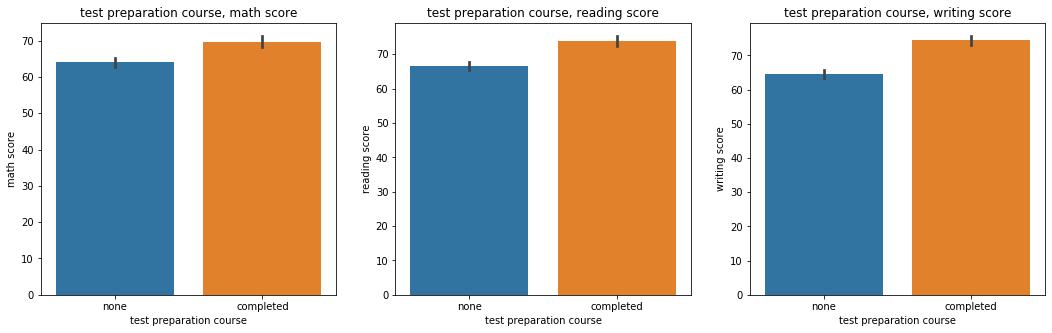

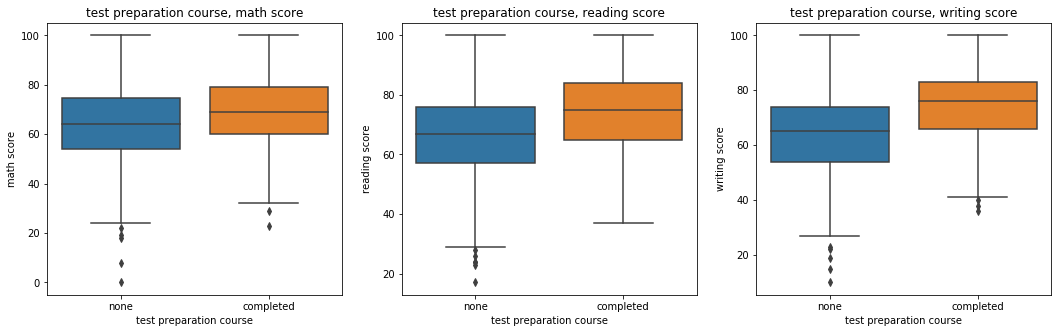

In [62]:
# let's first start with barplot to compare average
# group by test preparation course
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(df["test preparation course"], df["math score"])
plt.title("test preparation course, math score")

plt.subplot(1,3,2)
sns.barplot(df["test preparation course"], df["reading score"])
plt.title("test preparation course, reading score")

plt.subplot(1,3,3)
sns.barplot(df["test preparation course"], df["writing score"])
plt.title("test preparation course, writing score")
plt.show()

# to gain more info we can use boxplot
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(df["test preparation course"], df["math score"])
plt.title("test preparation course, math score")

plt.subplot(1,3,2)
sns.boxplot(df["test preparation course"], df["reading score"])
plt.title("test preparation course, reading score")

plt.subplot(1,3,3)
sns.boxplot(df["test preparation course"], df["writing score"])
plt.title("test preparation course, writing score")
plt.show()

In [63]:
# question3 continued. let's test the significance. because from barplot it indicats the significance differet
from scipy import stats
print('t-test between test prep group on math score: {}'.format(stats.ttest_ind(df.loc[df["test preparation course"]=='completed',"math score"],
                df.loc[df["test preparation course"]=='none',"math score"])))
print('t-test between test prep group on reading score: {}'.format(stats.ttest_ind(df.loc[df["test preparation course"]=='completed',"reading score"],
                df.loc[df["test preparation course"]=='none',"reading score"])))
print('t-test between test prep group on writing score: {}'.format(stats.ttest_ind(df.loc[df["test preparation course"]=='completed',"writing score"],
                df.loc[df["test preparation course"]=='none',"writing score"])))


t-test between test prep group on math score: Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)
t-test between test prep group on reading score: Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)
t-test between test prep group on writing score: Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)


4. Which 2 exam scores are most correlated with each other?

ANS: we use visulization methods to show correlation. also the heatmap show correaltion coefficient as well, that's a plus

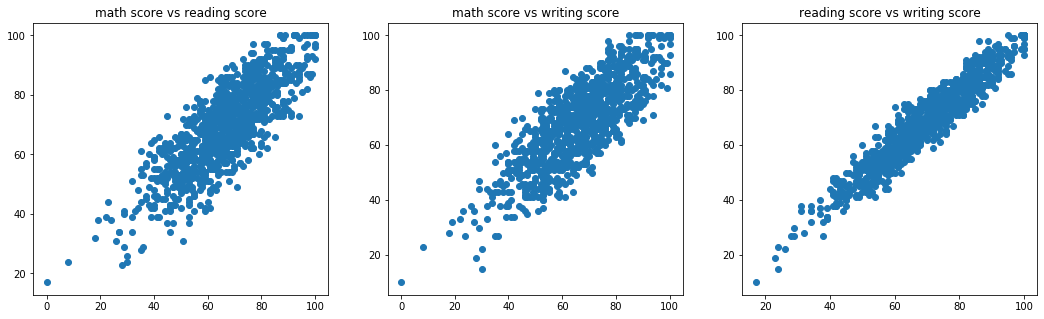

In [64]:
# let's start with visulization methods - scatter plot
student_df = df.copy()
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("reading score vs writing score")
plt.show()



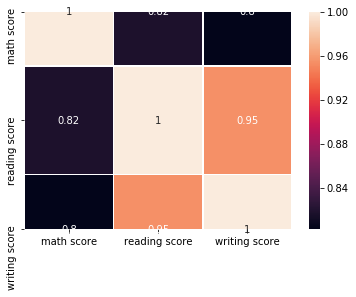

In [74]:
# then let's try heatmap
plt.figure(figsize=(6,4))
df_score = df[["math score", "reading score", "writing score"]].copy()
df_corr = df_score.corr()
sns.heatmap(df_corr, square=False, annot=True, linewidths=.5)
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [67]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [68]:
df.loc[df.gender=='female', 'math score']

0      72
1      69
2      90
5      71
6      88
       ..
993    62
995    88
997    59
998    68
999    77
Name: math score, Length: 518, dtype: int64